Is prize money distributed accordingly in the worldwide tennis community?

Tennis (singles) is a game played between two players with rackets where they hit a tennis ball back and forth until one player hits it out of bounds. There are many types of statistics that can be recorded for tennis players; but only 3 of them (Age, Current Elo, Seasons) will be used as predictors during our analysis. These predictors will be elaborated on in the “methods” section of this proposal. In this project, we will operate on the “Player Stats for Top 500 Players” dataset, and answer the following predictive question:

How do age, current Elo, and seasons influence the prize money that a player can make? 


New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Seasons,Current.Elo.Rank,Prize.Money
<dbl>,<dbl>,<chr>,<dbl>
25,5,1602,122734
25,5,1773,827193
29,12,1795,627102
26,7,1763,397175
27,5,1787,849099
29,6,1765,818258
26,4,1750,299185
23,6,1709,721726
22,5,1859,770281


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


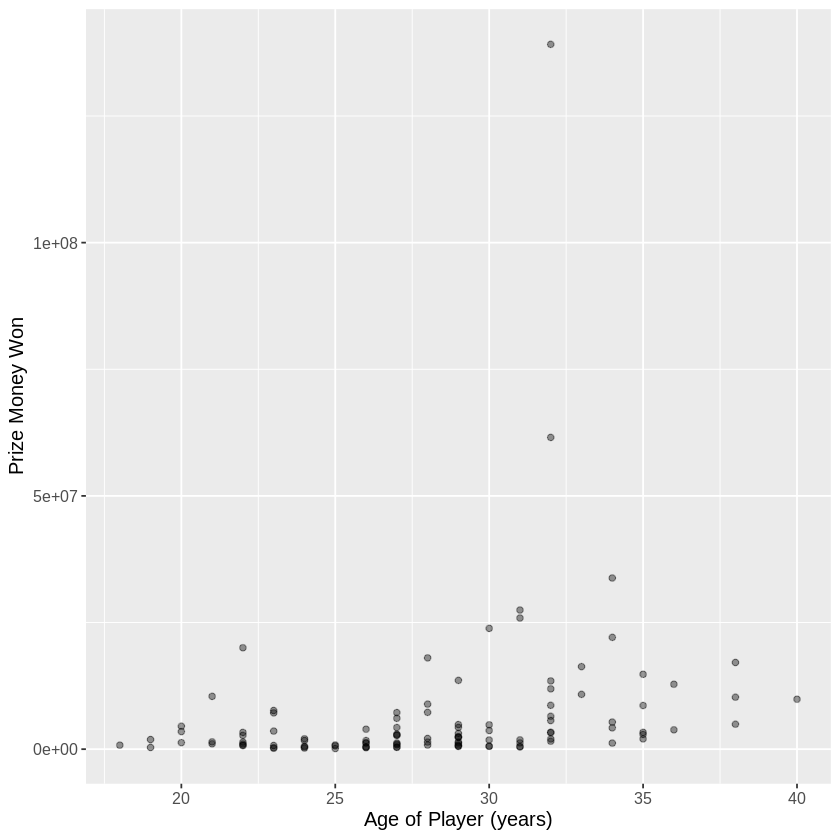

Warning message:
“Removed 1 rows containing missing values (geom_point).”


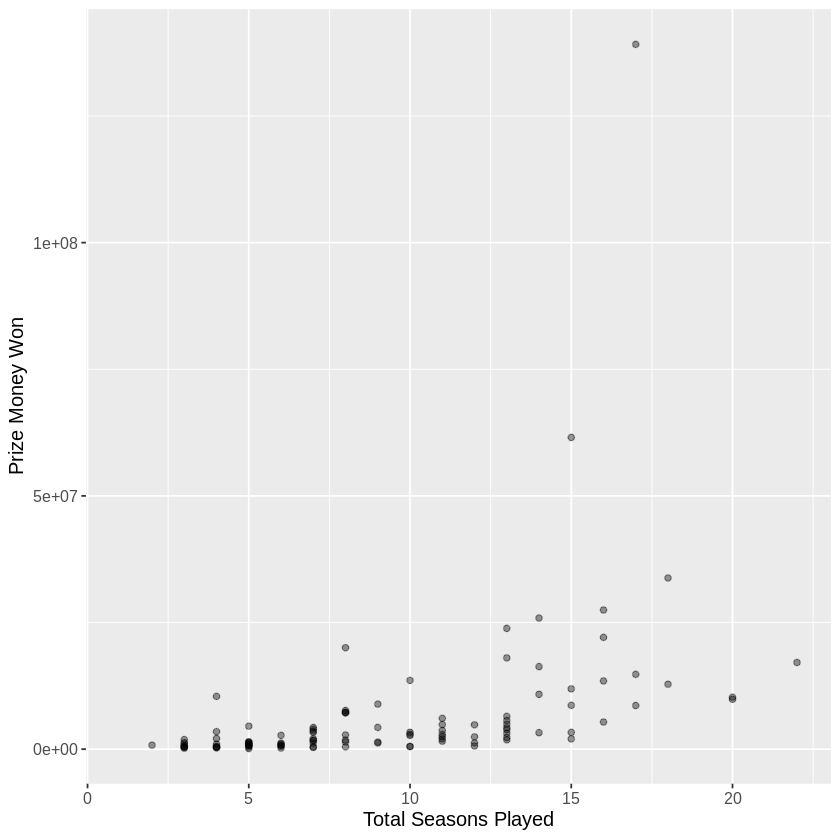

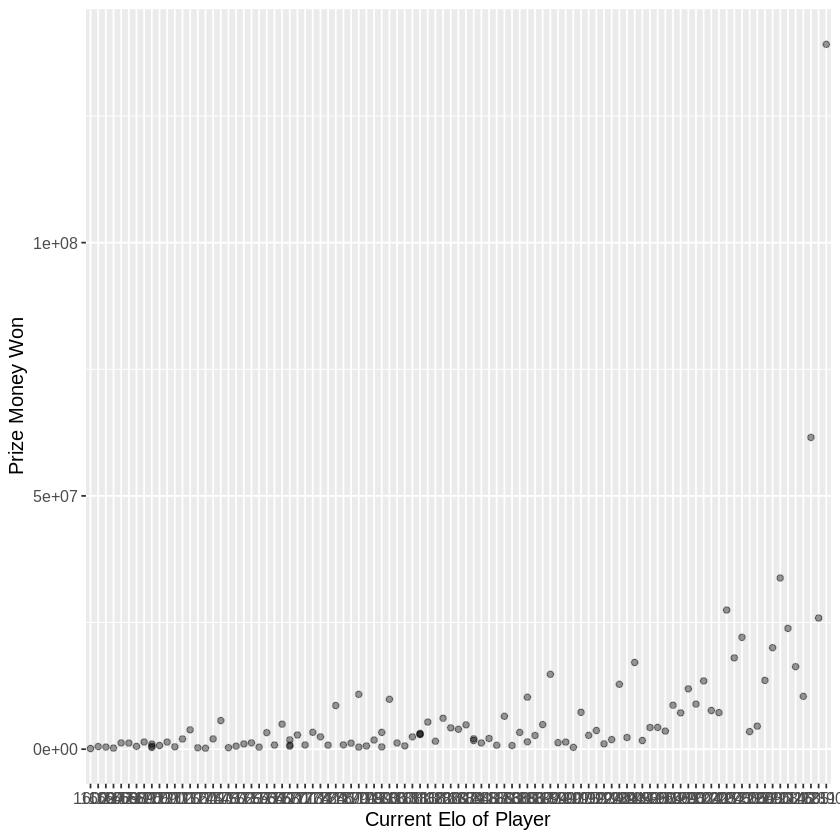

In [5]:
library(tidyverse)
library(tidymodels)
library(gridExtra)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)

player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                           Current.Elo.Rank = gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank))),
                                           Prize.Money = parse_number(Prize.Money))

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

player_stats_train

player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point(alpha = 0.4) +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  theme(text = element_text(size = 12))

player_age_plot

player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point(alpha = 0.4) +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  theme(text = element_text(size = 12))

player_seasons_plot

player_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point(alpha = 0.4) +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  theme(text = element_text(size = 12))

player_elo_plot

We will predict how much money a player can make using the columns Age, Season, and Current Elo, as predictors. Our general procedure to tidy the data would first be to select the predicting columns, as well as tidy the observations to single data types. The next step taken would be to filter for active tennis players, and plot the prize money column as a function of each predictor. This would determine how each predictor affects the prize money and could help determine if we chose correctly when selecting for predictors we thought would have the greatest effect on the outcome, prize money. After the predictor has been made, we can visualise the results as an accuracy number of our predictor on the testing data. 

The expected outcome is that as Age, Current Elo, and Seasons increase, the prize money will also increase. This is because having a higher value for Age/Seasons means a player has more experience and more opportunities to earn prize money. In addition, since Current Elo is a measure of strength (in terms of tennis), it’s reasonable to assume that stronger players will make more money than weaker players. The findings from this analysis will lay the groundwork for determining how much a player can make depending on how long and well they play. This could impact the number of people that choose to pursue a tennis career, as they’ll have a clearer image of how much money they’ll make. An example of a question these outcomes could lead to is: “Are current players being paid accordingly based on their age, Elo, and seasons? Which players are being underpaid and which are overpaid?”